<a href="https://colab.research.google.com/github/Shenghao27/Prediction-of-quality-of-Wine/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_06_%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境準備 : 載入套件

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 載入&觀察資料

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# 修改欄位名稱
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

欄位定義(參考kaggle &UCI)

*   'fixed_acidity':固定酸度 / 與葡萄酒有關的大多數酸性物質是固定的或非揮發性的（不容易蒸發）
*   'volatile_acidity':揮發性酸度 / 葡萄酒中的醋酸含量，含量過高會產生的醋味
*   'citric_acid':檸檬酸 / 少量的檸檬酸可增加葡萄酒的「新鮮感」和風味
*   'residual_sugar':殘餘糖份 / 發酵結束後剩餘的糖分，少於 1 克/升的葡萄酒很少見，大於 45 克/升的葡萄酒被視為甜酒。
*   'chlorides':氯化物 / 葡萄酒中的鹽分含量
*   'free_sulfur_dioxide':遊離二氧化硫 / 游離形式的 SO2 存在於分子 SO2（作為溶解氣體）和亞硫酸氫鹽離子之間的平衡狀態；它可以防止微生物生長和葡萄酒的氧化。
*   'total_sulfur_dioxide':總二氧化硫 / 游離和結合形式的二氧化硫的數量；在低濃度時，葡萄酒中大多無法檢測到二氧化硫，但當游離二氧化硫濃度超過 50 ppm 時，二氧化硫會在葡萄酒的嗅覺和口感中變得明顯。
*   'density':密度 / 水的密度幾乎取決於酒精百分比和糖分含量
*   'pH':酸鹼值 / 描述葡萄酒的酸性或鹼性，酸度範圍從 0（非常酸）到 14（非常鹼）；大多數葡萄酒的 pH 值介於 3-4 之間。
*   'sulphates':硫酸鹽 / 一種葡萄酒添加劑，可增加二氧化硫氣體 (S02) 的含量，具有抗菌和抗氧化的作用。
*   'alcohol':酒精度 / 葡萄酒的酒精含量
*   'quality':品質 / 基於感官資料,0 到 10 分之間

In [4]:
df.info()
# 並無遺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='quality', ylabel='count'>

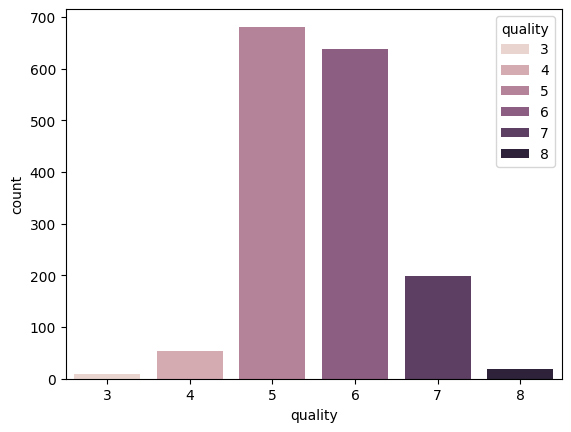

In [6]:
# 觀察Target('quality')的類別分布程度
sns.countplot(x='quality', hue='quality', data=df)

# 從圖表可明顯看出 quality 有類別不平衡（class imbalance）的情況
# 會導致預測結果偏向'5'或'6'，建模時需再留意

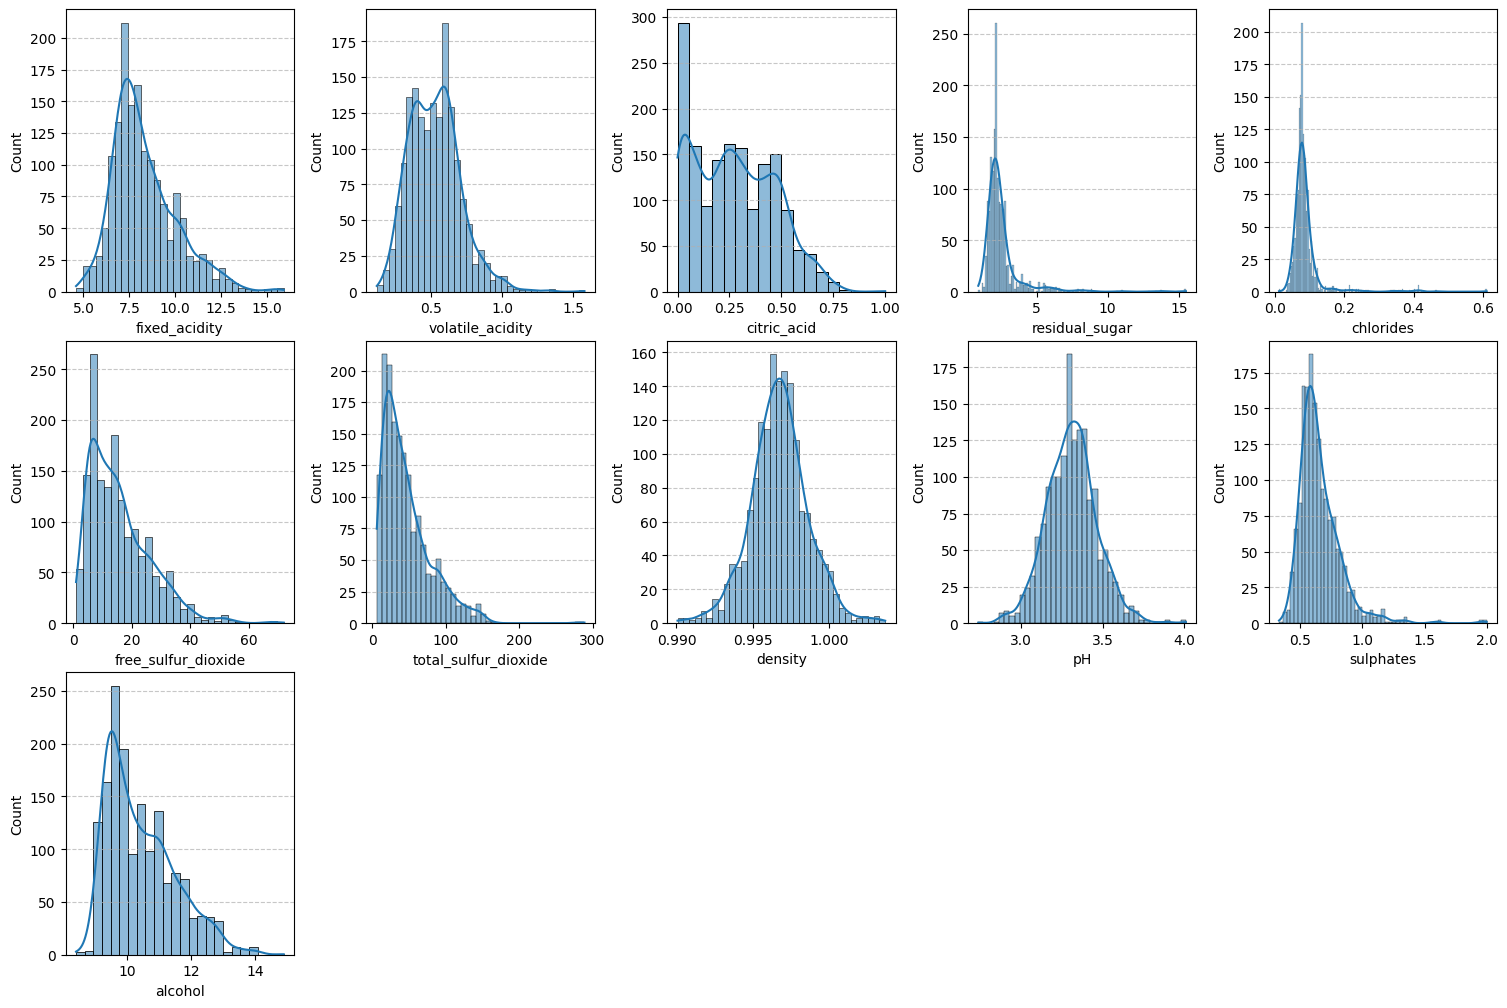

('chlorides', 'sulphates')

In [7]:
# 每個特徵的資料分布---直方圖（Histogram）
# 先把不需要的 target 欄位排除
feature_cols = df.columns.drop('quality')

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.histplot(
        df[col],
        kde=True,
        ax=axes[i]
        # color='skyblue'
    )
    # axes[i].set_title(f'Distribution of {col}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# 若特徵數少於子圖數，關閉多餘的子圖
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=0.4)
plt.show()

'chlorides','sulphates'

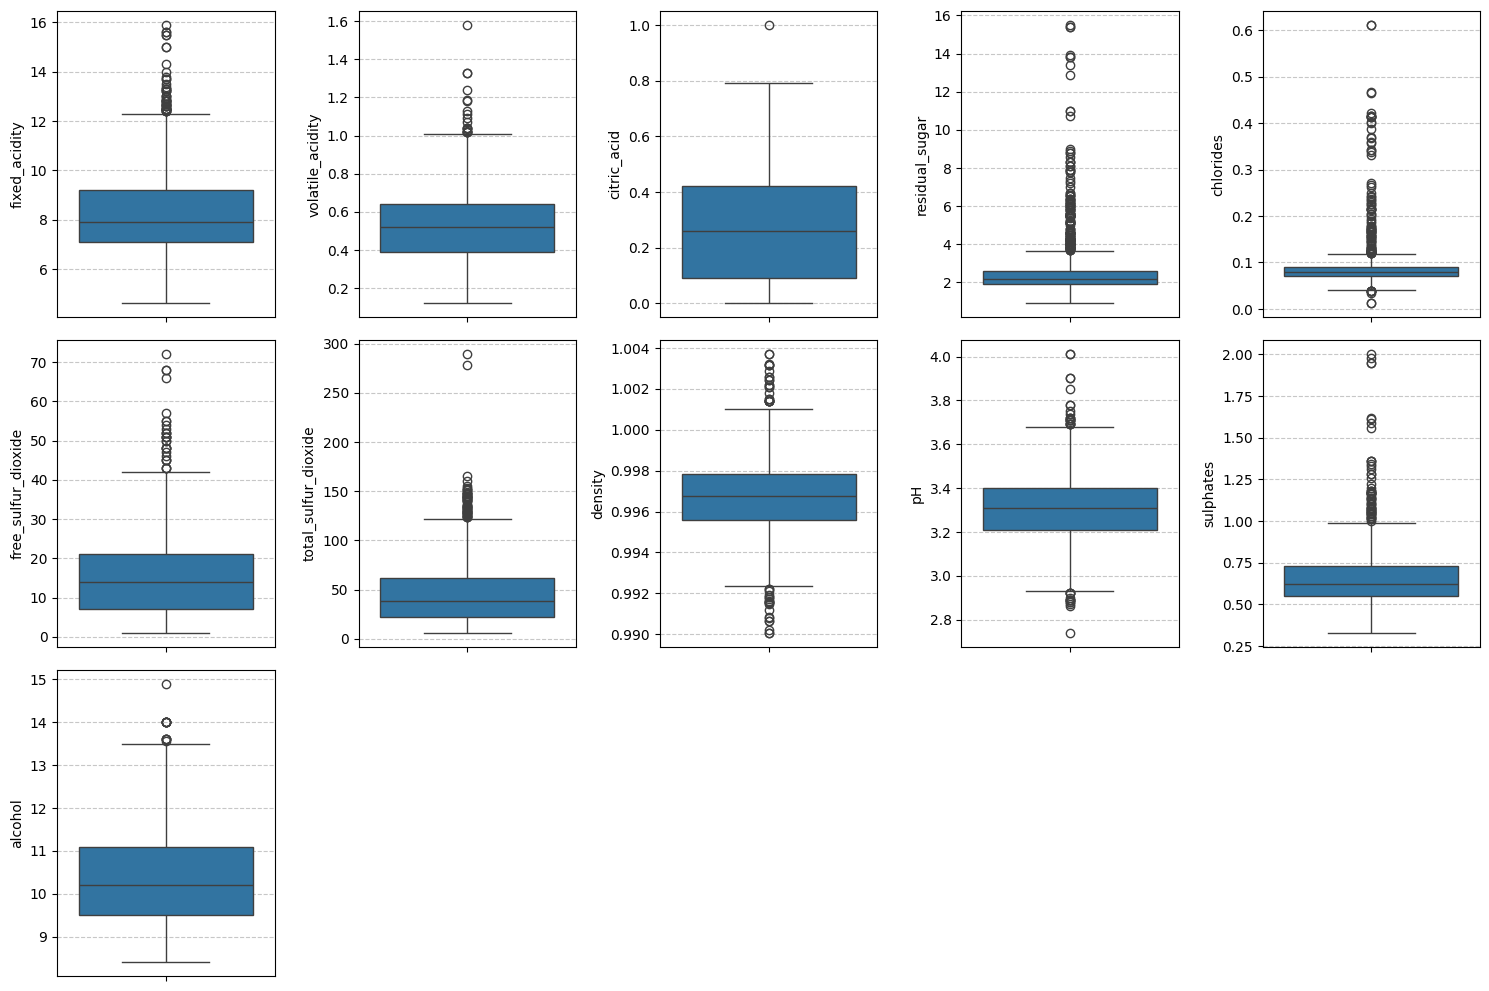

In [8]:
# 每個特徵的資料分布---箱型圖（Boxplot）
# 先把不需要的 target 欄位排除
feature_cols = df.columns.drop('quality')

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.boxplot(
        y=df[col],
        ax=axes[i]
        )
    # axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# 如果子圖數 > 特徵數，關閉多餘子圖
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

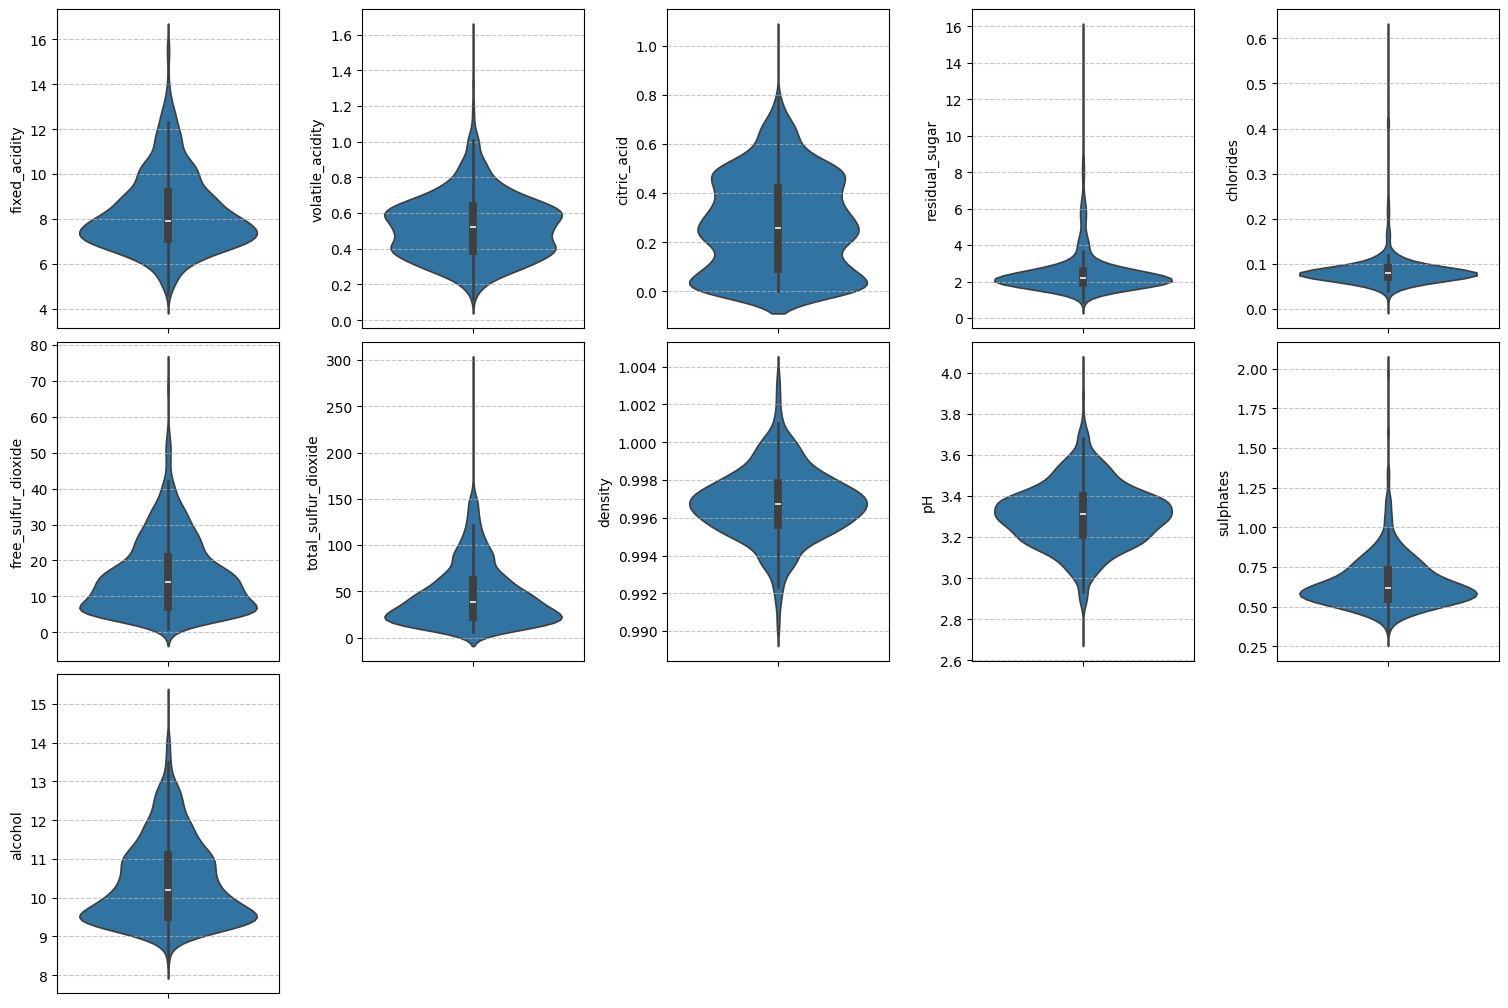

In [9]:
# 每個特徵的資料分布---小提琴圖（Violin plot）
# 先把不需要的 target 欄位排除
feature_cols = df.columns.drop('quality')

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.violinplot(
        y=df[col],
        ax=axes[i]
        )
    # axes[i].set_title(f'Distribution of {col}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# 若特徵數少於子圖數，關閉多餘的子圖
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=0.4)
plt.show()


✅ 各特徵分布觀察

1️⃣ **fixed_acidity、volatile_acidity、citric_acid**

* 都是**明顯右偏分布**：大多數數值集中在左邊，少數值落在右側高值區。
* 表示大部分紅酒酸度偏低，少數有較高酸度。

2️⃣ **residual_sugar**

* **極端的右偏分布**。
* 大部分樣本糖分很低，少部分樣本糖分非常高 → 異常高糖分樣本會影響模型，需要留意。

3️⃣ **chlorides**

* **極端的右偏分布**。
* 大部分在低值，極少數樣本氯含量非常高 → 潛在異常。

4️⃣ **free_sulfur_dioxide、total_sulfur_dioxide**

* **明顯右偏分布**。
* 大多數酒硫含量低，但少數樣本硫含量高很多 → 長尾分布明顯。

5️⃣ **density**

* 接近常態分布。
* 分布相對對稱，稍有輕微右偏。

6️⃣ **pH**

* 接近常態分布。
* 分布偏中性，稍微右偏；多數紅酒 pH 值集中在 3.0–3.4。

7️⃣ **sulphates**

* **明顯右偏分布**。
* 大部分硫酸鹽含量集中在低值。

8️⃣ **alcohol**

* 右偏分布。
* 多數酒精度在 9–11% 左右，少數酒精度高到 13–14%。


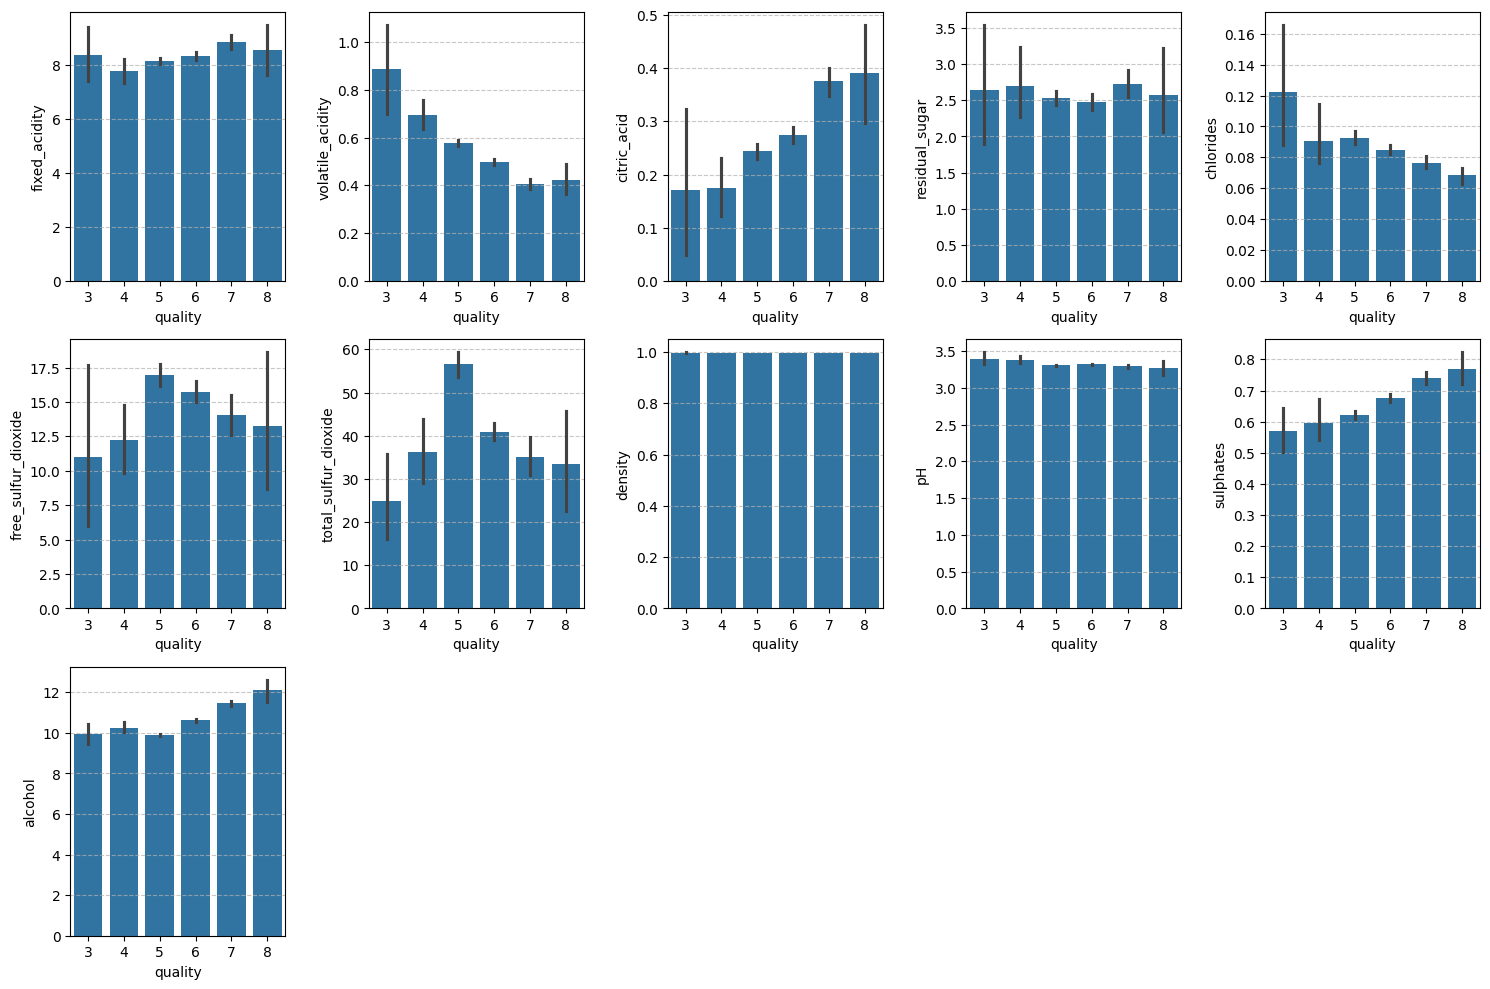

In [10]:
# 觀察每一個欄位與 quality 資料分佈的情況
# 先把不需要的 target 欄位排除
feature_cols = df.columns.drop('quality')

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(feature_cols):
    sns.barplot(
        data=df,
        x='quality',
        y=col,
        ax=axes[i]
        )
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# 若特徵數少於子圖數，關閉多餘的子圖
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 觀察後的結果:
# fixed acidity / residual sugar, :趨勢不明顯
# volatile acidity / chlorides :呈現明顯下降趨勢。
# citric acid / sulphates / alcohol:呈現上升趨勢。
# free sulfur dioxide / total sulfur dioxide:沒有穩定趨勢，且誤差大。
# density / pH :幾乎平直，可能與品質沒有顯著線性關聯。


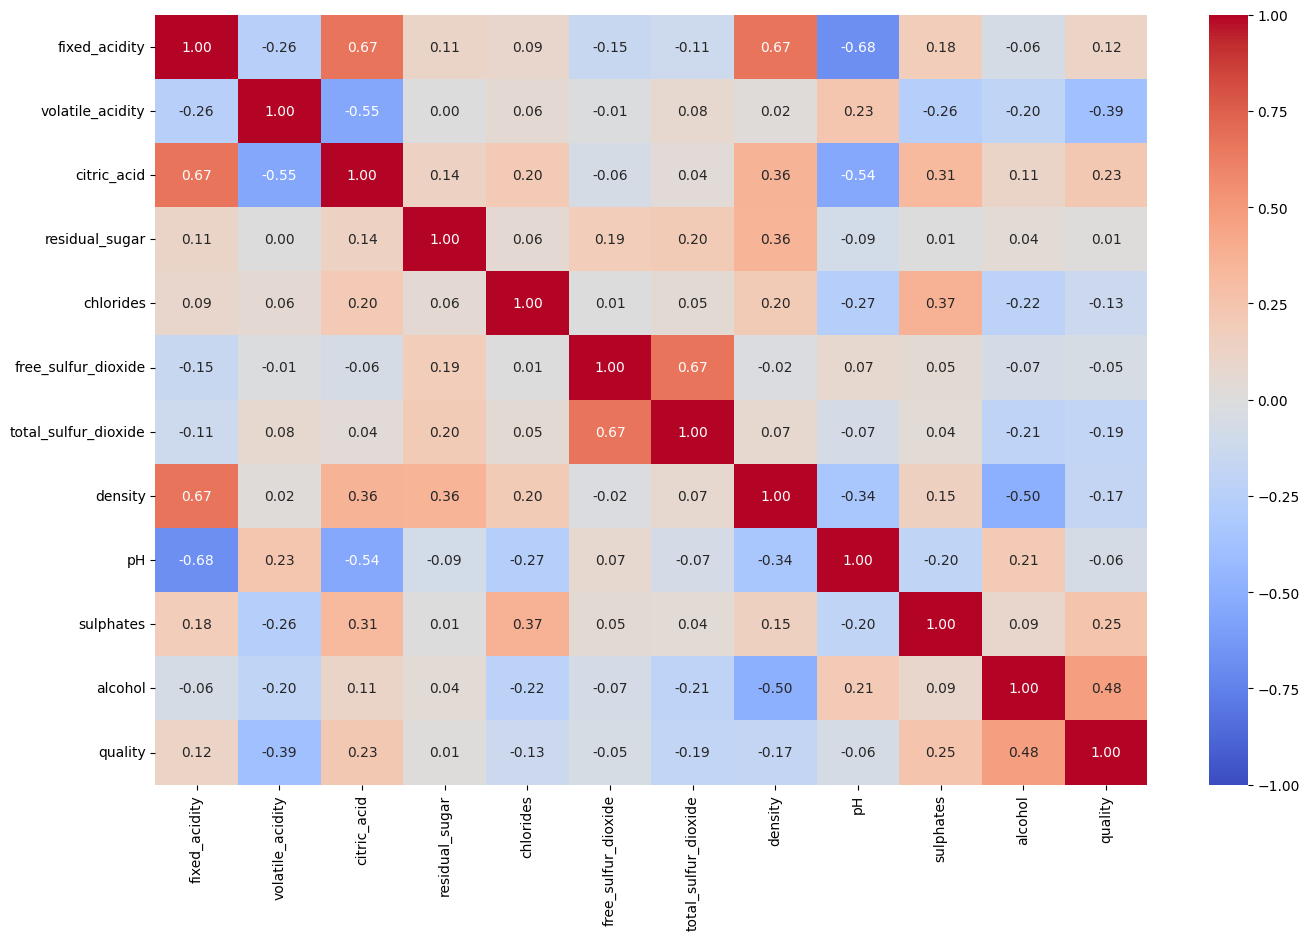

In [11]:
# 比較每個特徵間的關聯程度
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()

# 資料清理 Data cleaning

*   遺失值補植
*   型態(Dtype)錯誤轉換



In [12]:
# 檢查遺失值:觀察結果無遺失值，不用補值
df.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


In [13]:
# 檢查資料型態:各欄位都是數值型態
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# 第一個 Baseline 版本

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df_train = df.copy()

X = df_train.drop('quality', axis = 1)
y = df_train['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print(rfc_eval)

[0.66015625 0.703125   0.64453125 0.68359375 0.75686275]


# Feature Engineering特徵工程

## 抽取新特徵

<Axes: xlabel='mso2', ylabel='Count'>

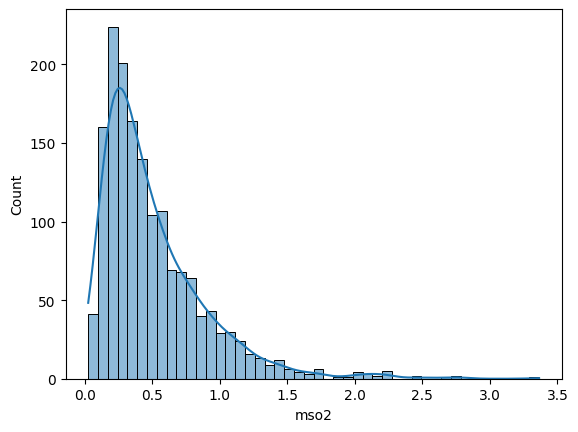

In [15]:
#參考Santa Rosa 文章(http://srjcstaff.santarosa.edu/~jhenderson/SO2.pdf)
#葡萄酒中沒有足夠的 SO2 ，品質就會變差，而較高的 pH 值需要較多的游離二氧化硫。
#分子SO₂公式（Molecular SO₂）計算方式，建立新特徵
df['mso2'] = df['free_sulfur_dioxide'] / (1 + 10 ** (df['pH'] - 1.81))
sns.histplot(data=df, x='mso2', kde=True)

<Axes: xlabel='quality', ylabel='mso2'>

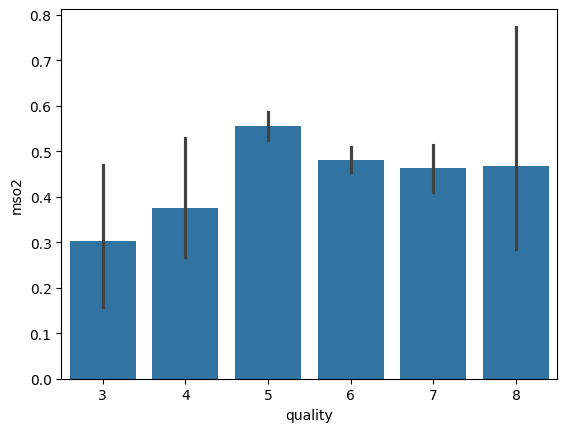

In [16]:
sns.barplot(data=df, x='quality', y='mso2')

<Axes: xlabel='total_acidity', ylabel='Count'>

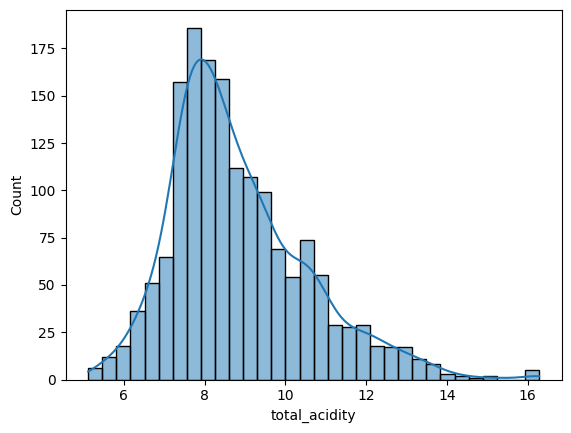

In [17]:
#總酸（Total Acidity）
#固定酸與揮發酸的總和。代表酸的整體強度。
df['total_acidity'] = df['fixed_acidity'] + df['volatile_acidity']
sns.histplot(data=df, x='total_acidity', kde=True)

<Axes: xlabel='sugar_acid_ratio', ylabel='Count'>

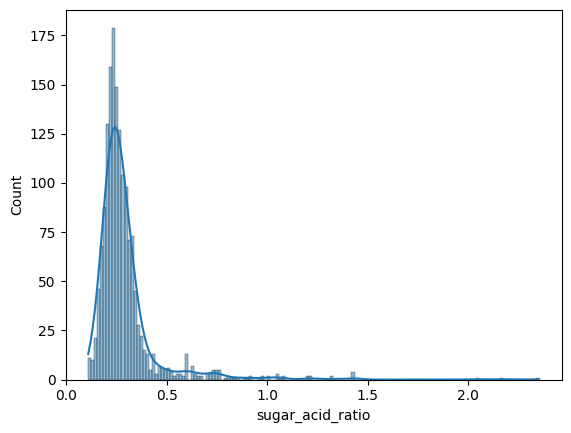

In [18]:
#糖酸比（Sugar/Acid Ratio）
#較高的糖酸比通常會讓酒嘗起來更甜。
df['sugar_acid_ratio'] = df['residual_sugar'] / df['total_acidity']
sns.histplot(data=df, x='sugar_acid_ratio', kde=True)

<Axes: xlabel='alcohol_density_ratio', ylabel='Count'>

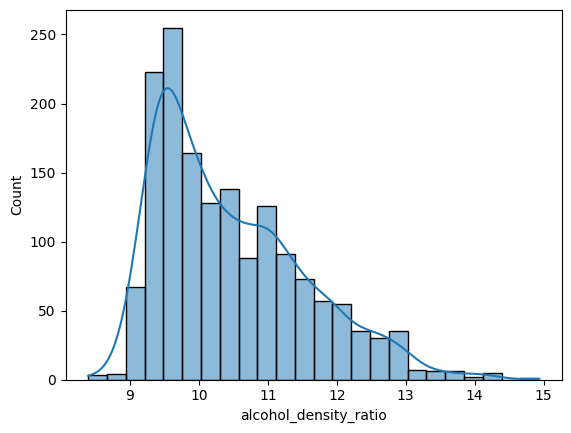

In [19]:
#密度與酒精的關係
#較高酒精通常意味著較低密度，可以用來反映發酵程度。
df['alcohol_density_ratio'] = df['alcohol'] / df['density']
sns.histplot(data=df, x='alcohol_density_ratio', kde=True)

<Axes: xlabel='sulphate_ph_interaction', ylabel='Count'>

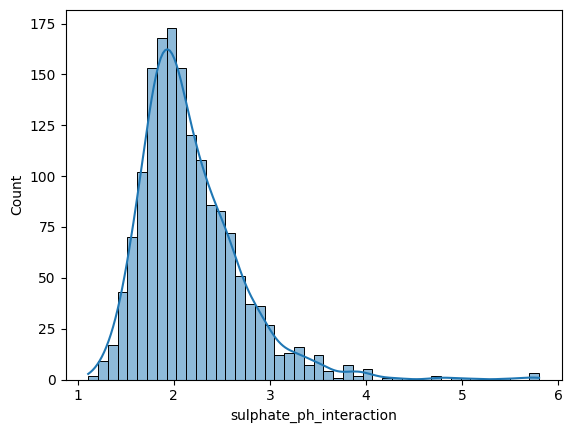

In [20]:
#酸鹼平衡指標：pH 與硫酸鹽含量
#硫酸鹽有助於保存和風味，與 pH 有交互關係。
df['sulphate_ph_interaction'] = df['sulphates'] * df['pH']
sns.histplot(data=df, x='sulphate_ph_interaction', kde=True)

## 資料型態轉換

*   LabelEncoder()
*   OneHotEncoder:pd.get_dummies()



In [21]:
from sklearn.preprocessing import LabelEncoder
# 把quality的分數，分成'優質'&'劣質'酒的類別
df['qlabel'] = pd.cut(df['quality'], bins=[0, 6.5, 10], labels=['No', 'Yes'])
df['qlabel'] = LabelEncoder().fit_transform(df['qlabel'])
# 查看資料維度
print(df.shape)

(1599, 18)


<Axes: xlabel='qlabel', ylabel='count'>

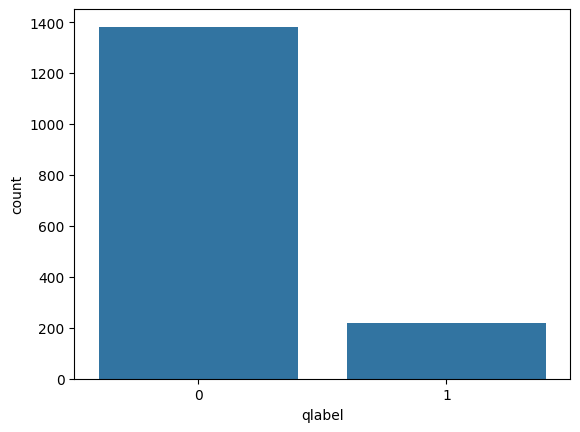

In [22]:
sns.countplot(x='qlabel', data=df)
# 從圖表來看，資料有明顯不平衡的問題。
# 會導致模型傾向預測為多數類別（例如永遠預測成 "No"或著也可能有高準確率，但其實沒學到什麼）。
# 建議建模時，使用SMOTE會根據少數類別樣本，在特徵空間中合成新的相似資料點。這特別適合處理類別不平衡問題，且不會簡單重複資料。
# 或是權重調整：LogisticRegression(class_weight='balanced')，可以幫助模型在訓練時自動調整每一類的權重。

## Feature scaling 特徵縮放

*   Standardization（Z-score 標準化）
   *   轉換後資料會是「平均值 = 0，標準差 = 1」的分布。
   *   適合模型:線性模型、SVM


*   Min-Max Normalization（最小-最大縮放）
   *   把數值縮放到 [0, 1] 區間內（或指定區間 [a, b]）。
   *   適合模型:神經網絡、影像處理
*  參考資料:
   *   https://www.bigdataelearning.com/blog/normalization-vs-standardization?utm_source=chatgpt.com


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# df['residual sugar_Stand']=scaler.fit_transform(df['residual sugar'].to_numpy().reshape(-1, 1))

columns_to_scale = ['residual_sugar', 'chlorides', 'sulphates'] #'sugar_acid_ratio'

for col in columns_to_scale:
    scaled_values = scaler.fit_transform(df[col].to_numpy().reshape(-1, 1))
    df[f'{col}_Stand'] = scaled_values

df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,...,quality,mso2,total_acidity,sugar_acid_ratio,alcohol_density_ratio,sulphate_ph_interaction,qlabel,residual_sugar_Stand,chlorides_Stand,sulphates_Stand
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,5,0.215185,8.10,0.234568,9.420726,1.9656,0,-0.453218,-0.243707,-0.579207
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,5,0.978585,8.68,0.299539,9.831461,2.1760,0,0.043416,0.223875,0.128950
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,5,0.513983,8.56,0.268692,9.829488,2.1190,0,-0.169427,0.096353,-0.048089
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,6,0.726893,11.48,0.165505,9.819639,1.8328,0,-0.453218,-0.264960,-0.461180
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,5,0.215185,8.10,0.234568,9.420726,1.9656,0,-0.453218,-0.243707,-0.579207


<Axes: xlabel='sugar_acid_ratio_log_std', ylabel='Count'>

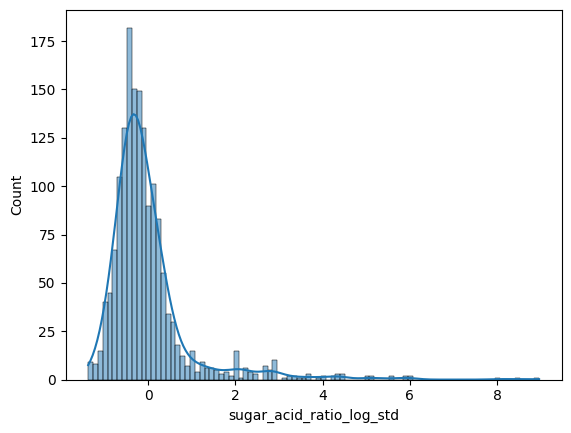

In [24]:
# 避免 log(0)，加個小常數
df['sugar_acid_ratio_log'] = np.log1p(df['sugar_acid_ratio'])

scaler = StandardScaler()
df['sugar_acid_ratio_log_std'] = scaler.fit_transform(df[['sugar_acid_ratio_log']])
sns.histplot(data=df, x='sugar_acid_ratio_log_std', kde=True)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

columns_to_scale = ['residual_sugar', 'chlorides', 'sulphates','sugar_acid_ratio'] #'sugar_acid_ratio'

for col in columns_to_scale:
    scaled_values = scaler.fit_transform(df[col].to_numpy().reshape(-1, 1))
    df[f'{col}_MinMax'] = scaled_values
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,...,qlabel,residual_sugar_Stand,chlorides_Stand,sulphates_Stand,sugar_acid_ratio_log,sugar_acid_ratio_log_std,residual_sugar_MinMax,chlorides_MinMax,sulphates_MinMax,sugar_acid_ratio_MinMax
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0,-0.453218,-0.243707,-0.579207,0.210721,-0.376836,0.068493,0.106845,0.137725,0.055552
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0,0.043416,0.223875,0.128950,0.262010,0.102676,0.116438,0.143573,0.209581,0.084532
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0,-0.169427,0.096353,-0.048089,0.237986,-0.121927,0.095890,0.133556,0.191617,0.070773
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0,-0.453218,-0.264960,-0.461180,0.153155,-0.915040,0.068493,0.105175,0.149701,0.024747
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0,-0.453218,-0.243707,-0.579207,0.210721,-0.376836,0.068493,0.106845,0.137725,0.055552


In [26]:
# sns.histplot(data=df, x='residual sugar_Stand', kde=True)

In [27]:
# sns.histplot(data=df, x='residual sugar_Normal', kde=True)

## Feature Selection特徵選取

In [38]:
from sklearn.ensemble import RandomForestClassifier

df_train = df.copy()

X = df_train.drop(['quality',"qlabel"], axis=1)
y = df_train['qlabel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)


# 顯示重要性
feature_names = X_train.columns
importances = forest.feature_importances_

# 排序後印出
sorted_idx = importances.argsort()[::-1]  # 從大到小排序
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {importances[idx]:.3f}")


# std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
# forest_importances = pd.Series(importances, index=feature_names)


# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

alcohol_density_ratio: 0.120
alcohol: 0.083
volatile_acidity: 0.068
total_sulfur_dioxide: 0.049
citric_acid: 0.047
sulphates_MinMax: 0.043
density: 0.043
sulphates_Stand: 0.043
sulphates: 0.041
sulphate_ph_interaction: 0.040
mso2: 0.039
total_acidity: 0.036
sugar_acid_ratio_log: 0.031
free_sulfur_dioxide: 0.031
chlorides: 0.030
pH: 0.030
chlorides_MinMax: 0.029
sugar_acid_ratio: 0.029
fixed_acidity: 0.028
sugar_acid_ratio_log_std: 0.027
sugar_acid_ratio_MinMax: 0.026
chlorides_Stand: 0.024
residual_sugar_Stand: 0.022
residual_sugar: 0.021
residual_sugar_MinMax: 0.019


alcohol_density_ratio       0.122512
alcohol                     0.099170
sulphates_Stand             0.063811
volatile_acidity            0.056807
sulphates                   0.055297
sulphate_ph_interaction     0.052013
sulphates_MinMax            0.049692
citric_acid                 0.049312
density                     0.043943
mso2                        0.037504
total_acidity               0.036316
pH                          0.032660
fixed_acidity               0.030135
chlorides_Stand             0.027819
sugar_acid_ratio            0.024606
total_sulfur_dioxide        0.023742
sugar_acid_ratio_log        0.022616
chlorides_MinMax            0.022488
sugar_acid_ratio_MinMax     0.022341
sugar_acid_ratio_log_std    0.022135
chlorides                   0.020030
residual_sugar_MinMax       0.016856
free_sulfur_dioxide         0.011865
residual_sugar              0.006586
residual_sugar_Stand        0.001334
dtype: float64


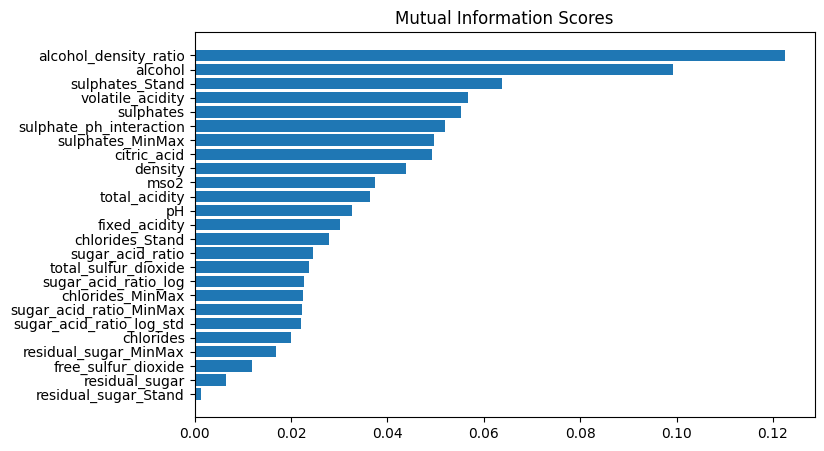

In [40]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df_mi = df.copy()
X = df_mi.drop(['quality',"qlabel"], axis=1)
y = df_mi["qlabel"]

# Label encode 類別欄位
for col in X.select_dtypes("object"):
    X[col] = LabelEncoder().fit_transform(X[col])

mi = mutual_info_classif(X, y, discrete_features="auto")
mi_result = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_result)

# 繪圖
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_result)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

df_train = df.copy()

# cols = ['quality',"qlabel",'free_sulfur_dioxide','residual_sugar_Stand',
#         'residual_sugar','residual_sugar_Stand','pH']

# cols = ['quality',"qlabel",'free_sulfur_dioxide','residual_sugar_MinMax',
#         'residual_sugar','residual_sugar_MinMax','pH']

# cols = ['quality',"qlabel",'free_sulfur_dioxide','residual_sugar',
#         'residual_sugar_Stand','residual_sugar_MinMax','pH']

# train_X = df_train.drop(cols, axis=1)

#篩選相關係數比較大的欄位
selected_features = mi_result[mi_result > 0.035].index.tolist()
train_X = df_train[selected_features]

train_y = df_train['qlabel']

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(f"準確率平均值:{scores.mean().round(5)}")

#使用Stand
#[0.875      0.846875   0.8875     0.846875   0.87774295]
#準確率平均值:0.8668

#使用MinMax
#[0.86875    0.846875   0.8875     0.853125   0.88401254]
#準確率平均值:0.86805

#使用Stand&MinMax
#[0.878125   0.846875   0.8875     0.846875   0.87774295]
#準確率平均值:0.86742

#使用Stand&MinMax 並用mi_result數值 > 0.035
#[0.859375   0.853125   0.88125    0.865625   0.89341693]
#準確率平均值:0.87056

[0.859375   0.853125   0.88125    0.865625   0.89341693]
準確率平均值:0.87056
